<a href="https://colab.research.google.com/github/iamsonia9/Web_scrap/blob/main/Logistic_Regression_Assignment12(Sonia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

**Importing the dataset**

In [3]:
df = pd.read_csv("/content/Social_Network_Ads (1).csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


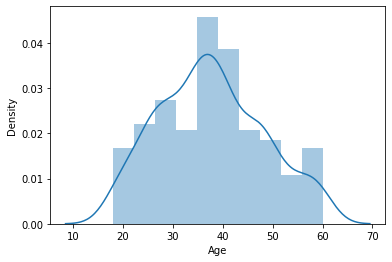

In [6]:
sns.distplot(df["Age"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


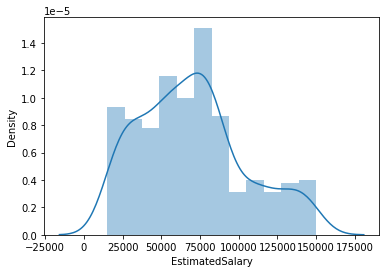

In [7]:
sns.distplot(df["EstimatedSalary"])

In [8]:
X = df[["Age","EstimatedSalary"]]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [9]:
y = df[["Purchased"]]

In [10]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [15]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
14,18,82000
363,42,79000
304,40,60000
361,53,34000


In [16]:
y_train

,Purchased
336,1
64,0
55,0
106,0
300,1
...,...
323,1
192,0
117,0
47,0


**Feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc_x = StandardScaler()

In [19]:
X_train = sc_x.fit_transform(X_train)

In [20]:
X_test = sc_x.transform(X_test)

In [21]:
X_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [22]:
X_test

array([[-7.98950822e-01,  4.94607583e-01],
       [-2.12648508e-02, -5.77359062e-01],
       [-3.12897090e-01,  1.46942725e-01],
       [-7.98950822e-01,  2.62831011e-01],
       [-3.12897090e-01, -5.77359062e-01],
       [-1.09058306e+00, -1.44652121e+00],
       [-7.01740076e-01, -1.59138156e+00],
       [-2.15686344e-01,  2.14601566e+00],
       [-1.96547978e+00, -5.58617754e-02],
       [ 8.53631867e-01, -7.80163563e-01],
       [-7.98950822e-01, -6.06331134e-01],
       [-9.93372315e-01, -4.32498705e-01],
       [-1.18475597e-01, -4.32498705e-01],
       [ 7.59458956e-02,  2.04886868e-01],
       [-1.77105829e+00,  4.65635512e-01],
       [-6.04529329e-01,  1.36376973e+00],
       [-1.18475597e-01,  2.04886868e-01],
       [-1.86826903e+00,  4.36663440e-01],
       [ 1.63131784e+00,  1.74040666e+00],
       [-3.12897090e-01, -1.38857706e+00],
       [-3.12897090e-01, -6.64275277e-01],
       [ 8.53631867e-01,  2.14601566e+00],
       [ 2.70367388e-01, -5.48386991e-01],
       [ 8.

In [23]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [24]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

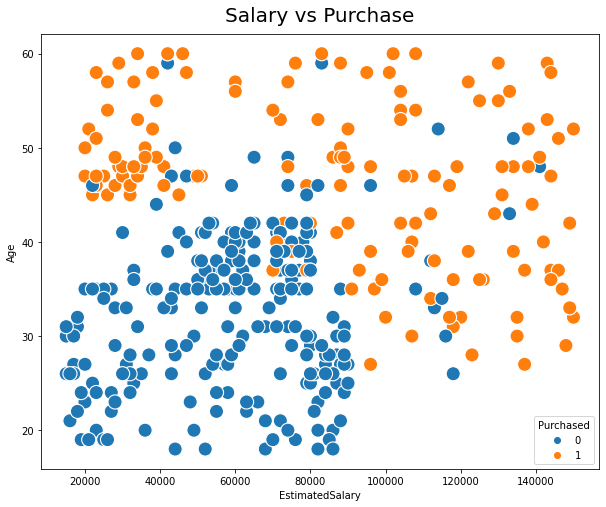

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.scatterplot(x='EstimatedSalary', y="Age", hue ='Purchased',data=df, s=200)
plt.title("Salary vs Purchase", y=1.015, fontsize=20)
plt.xlabel = ("EstimatedSalary")
plt.ylabel = ("Age")
ax = plt.gca()

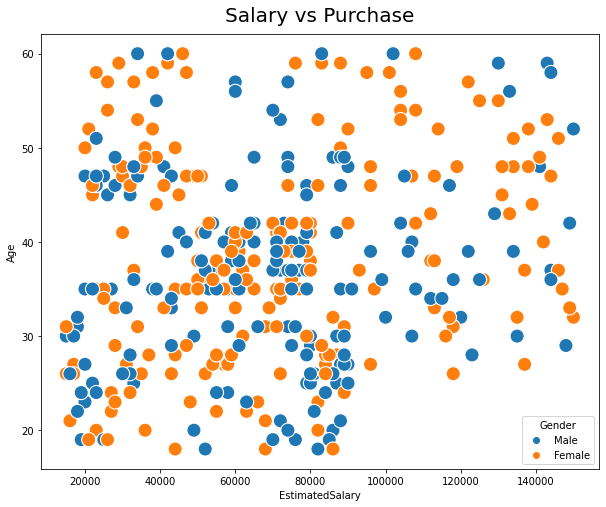

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.scatterplot(x='EstimatedSalary', y="Age", hue ='Gender',data=df, s=200)
plt.title("Salary vs Purchase", y=1.015, fontsize=20)
plt.xlabel = ("EstimatedSalary")
plt.ylabel = ("Age")
ax = plt.gca()

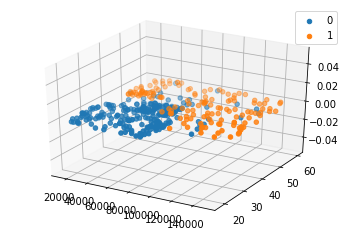

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for s in df.Purchased.unique():
  ax.scatter(df.EstimatedSalary[df.Purchased==s],df.Age[df.Purchased==s],label=s)
             
ax.legend()

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [28]:
from sklearn.linear_model import LogisticRegression
classifer_reg = LogisticRegression()

In [29]:
classifer_reg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Step 3 | Predection**

In [30]:
y_pred = classifer_reg.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [31]:
classifer_reg.coef_

array([[2.00316198, 1.08088613]])

In [32]:
classifer_reg.intercept_

array([-0.87076381])

In [33]:
classifer_reg.predict_proba([[57,50000]])

array([[0., 1.]])

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [34]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve,roc_auc_score,confusion_matrix, f1_score

In [35]:
classifer_reg.score(X_test,y_test) #accuracy

0.925

In [36]:
confusion_matrix(y_test,y_pred)

array([[57,  1],
       [ 5, 17]])

In [37]:
f1_score(y_test,y_pred)

0.85

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


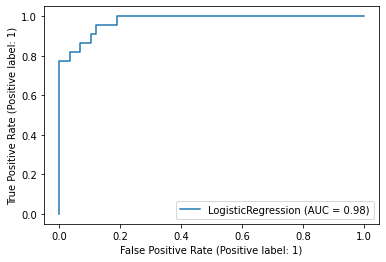

In [38]:
plot_roc_curve(classifer_reg, X_test, y_test)

**Visualization**

In [39]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation